In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Load the dataset from the CSV file
df = pd.read_csv("Original Dataset.csv")

In [17]:
# Group the data by year and area, and calculate the sum of the percentages
grouped_df = df.groupby(['year', 'Area'])['%'].sum().reset_index()

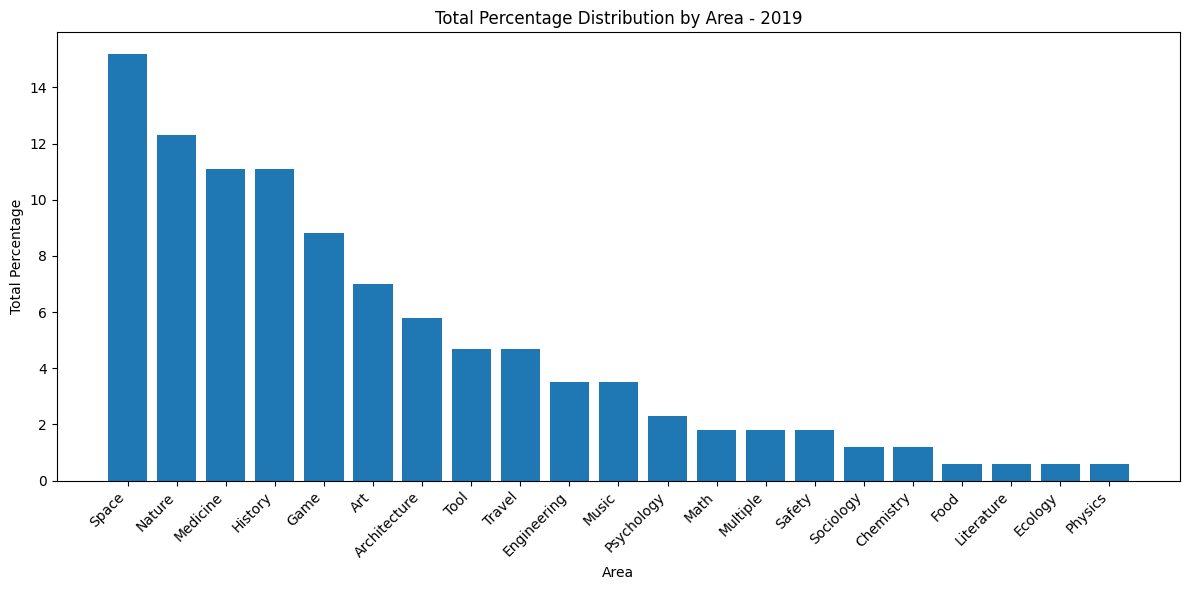

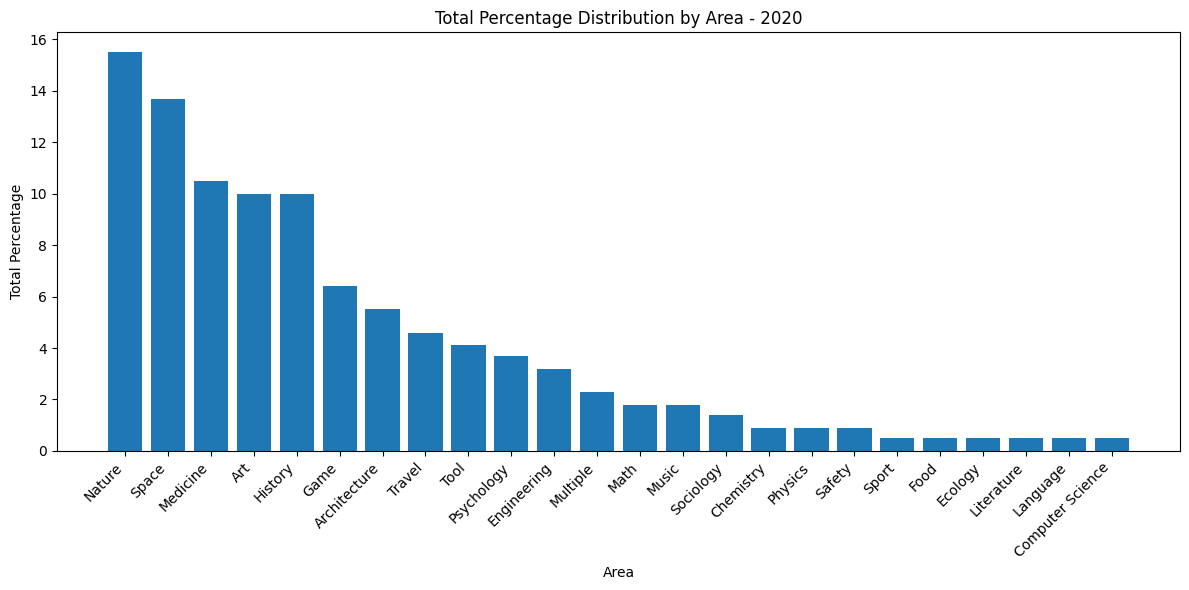

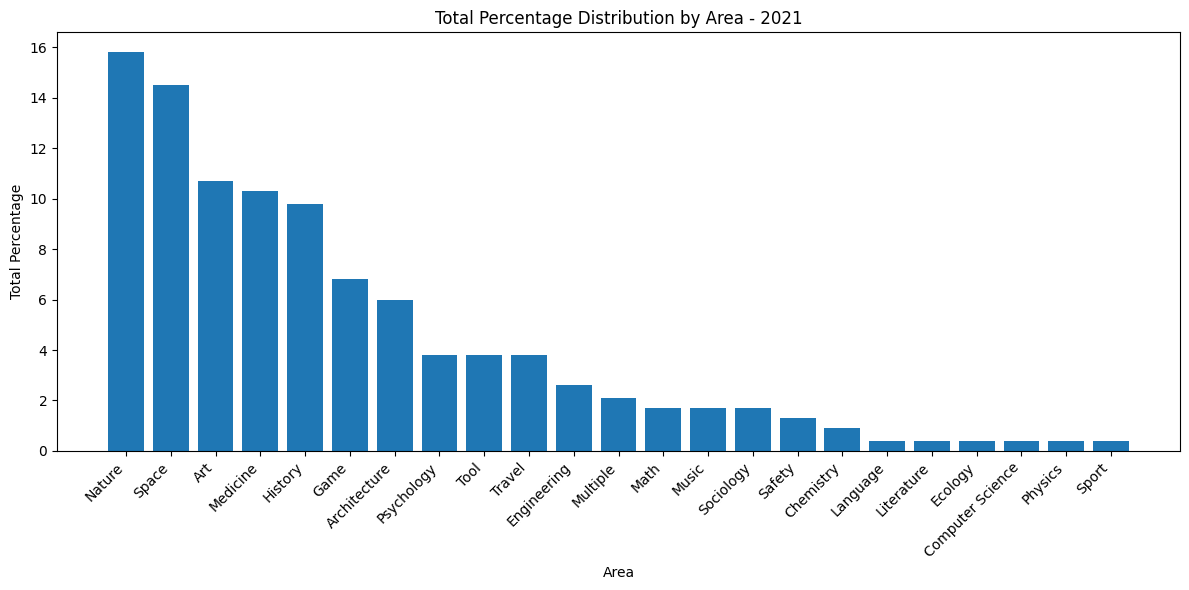

In [18]:
# Iterate over each year and create a separate plot
years = df['year'].unique()

for year in years:
    # Filter the data for the current year
    year_data = grouped_df[grouped_df['year'] == year]

    # Sort the data by the percentages in descending order
    sorted_data = year_data.sort_values('%', ascending=False)

    # Create a bar plot for the current year
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_data['Area'], sorted_data['%'])
    plt.xlabel('Area')
    plt.ylabel('Total Percentage')
    plt.title(f'Total Percentage Distribution by Area - {year}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [19]:
# Define the subcategories
education_areas = ['Space', 'Nature', 'History', 'Art', 'Architecture', 'Engineering', 'Psychology', 'Math', 'Computer Science', 'Safety', 'Chemistry', 'Sociology', 'Ecology', 'Literature', 'Physics', 'Language']
medicine_areas = ['Medicine']
entertainment_areas = ['Game', 'Travel', 'Music', 'Sport']
industry_areas = ['Tool', 'Food', 'Multiple']

In [20]:
# Categorize 'Area' values
df.loc[df['Area'].isin(education_areas), 'Area'] = 'Education'
df.loc[df['Area'].isin(medicine_areas), 'Area'] = 'Medicine'
df.loc[df['Area'].isin(entertainment_areas), 'Area'] = 'Entertainment'
df.loc[df['Area'].isin(industry_areas), 'Area'] = 'Industry'

In [21]:
# Group by 'Area' and calculate the average values of 'N' and '%'
grouped_df = df.groupby(['Area', 'year'], as_index=False).agg({'N': 'mean', '%': 'sum'})

In [22]:
# Calculate the '%' column values to ensure they sum up to 100
percent_sum = grouped_df.groupby('year')['%'].transform('sum')
grouped_df['%'] = 100 / percent_sum * grouped_df['%']

In [23]:
# Round the 'N' values to integers
grouped_df['N'] = grouped_df['N'].round().astype(int)

In [25]:
# Save the modified DataFrame as a new CSV file
grouped_df.to_csv('Sub-Categorized-Dataset.csv', index=False)